In [1]:
import pandas as pd
from importlib import reload
import src.Engines.analysis_engine as analysis_engine
import src.Connectors.gcp_bigquery_utils as gcp_bigquery_utils
reload(analysis_engine)
reload(gcp_bigquery_utils)

project_id = 'rnaseqml'
dataset_id = 'rnaseqexpression'
table_id = 'expr_clustered_08082024'
bq_queries = gcp_bigquery_utils.BigQueryQueries(project_id=project_id, 
                                              dataset_id=dataset_id,
                                              table_id=table_id)



I0000 00:00:1725599382.249260 4283055 config.cc:230] gRPC experiments enabled: call_status_override_on_cancellation, event_engine_dns, event_engine_listener, http2_stats_fix, monitoring_experiment, pick_first_new, trace_record_callops, work_serializer_clears_time_cache
I0000 00:00:1725599382.264501 4283055 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


In [6]:
data_from_bq_hnscc = bq_queries.get_df_for_pydeseq(primary_site='Head and Neck', primary_diagnosis='Squamous cell carcinoma, NOS')
data_from_bq_liver_hc = bq_queries.get_df_for_pydeseq(primary_site='Liver', primary_diagnosis='Hepatocellular carcinoma, clear cell type')
data_from_bq_uterus = bq_queries.get_df_for_pydeseq(primary_site='Uterus', primary_diagnosis='Carcinosarcoma, NOS')
data_from_bq_prostate = bq_queries.get_df_for_pydeseq(primary_site='Prostate', primary_diagnosis='Adenocarcinoma, NOS')

I0000 00:00:1725599796.249787 4283055 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported
I0000 00:00:1725599803.502362 4283055 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported
I0000 00:00:1725599806.399646 4283055 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported
I0000 00:00:1725599815.861159 4283055 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


## Head and Neck Squamous Cell Carcinoma

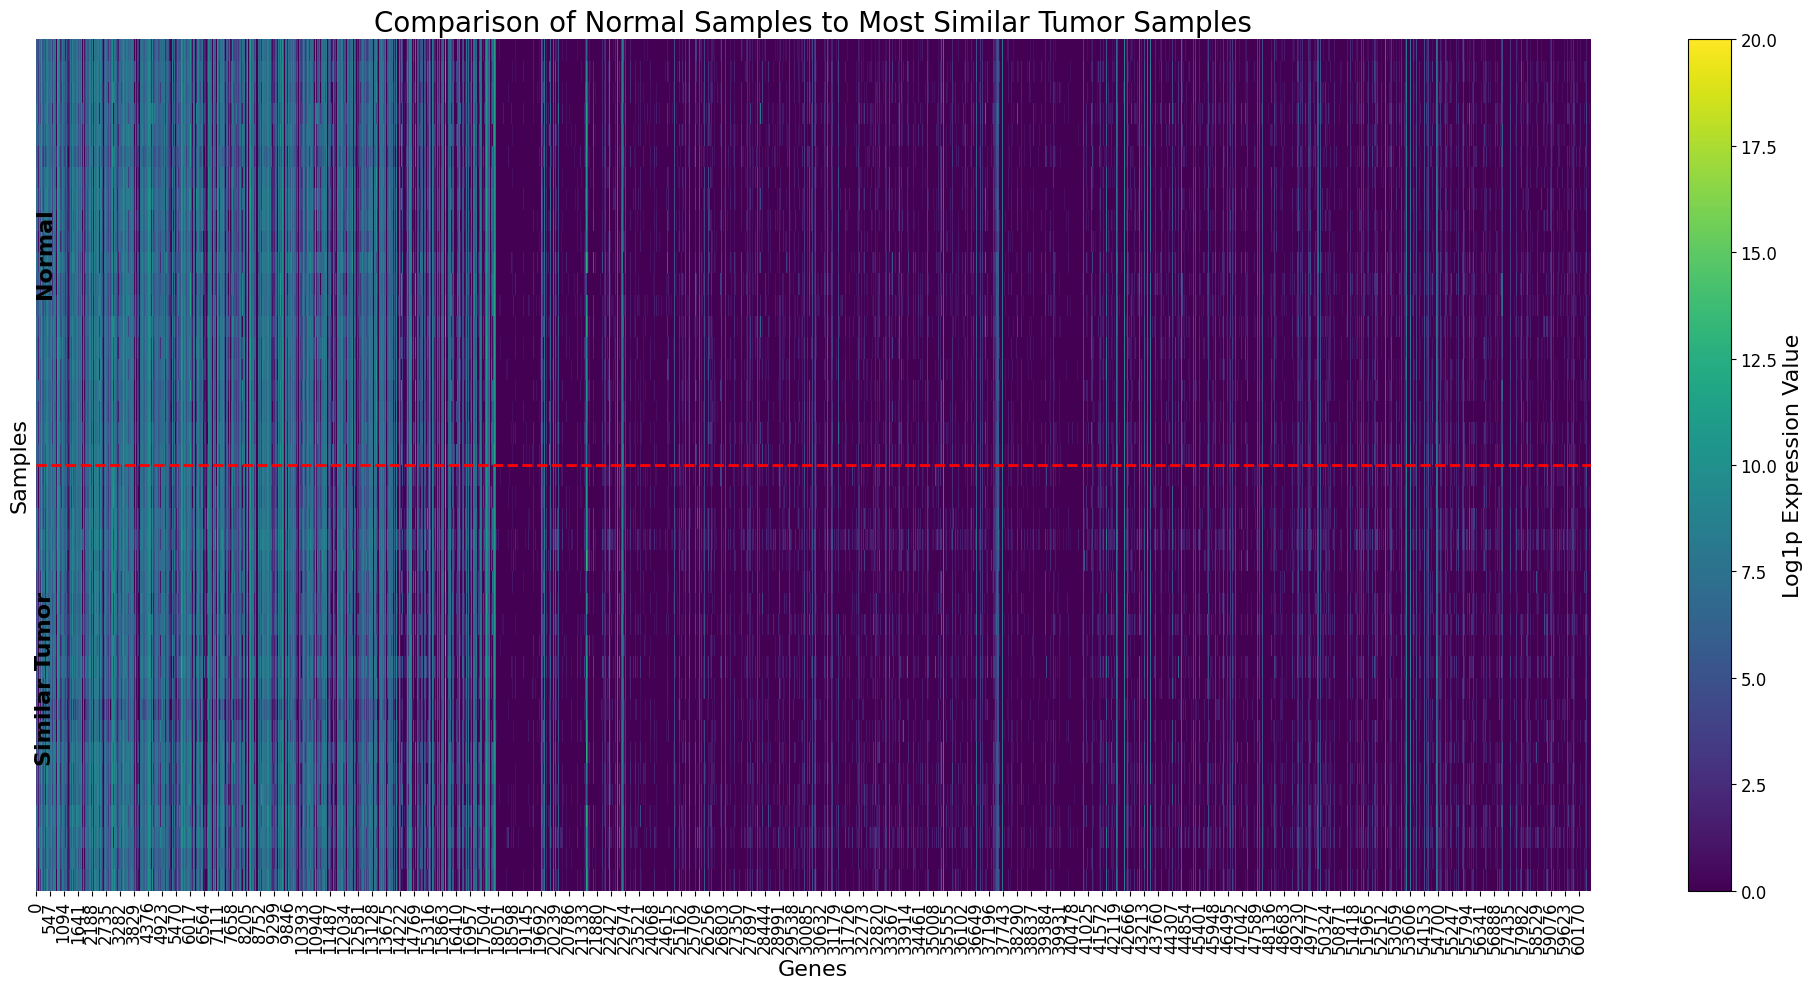

In [7]:
from importlib import reload
import src.ClassicML.DataAug.simulators as simulators
reload(simulators)
simulator = simulators.AutoencoderSimulator(data_from_bq_hnscc)
simulator.plot_similarity_heatmap()

## Liver Hepatocellular Carcinoma

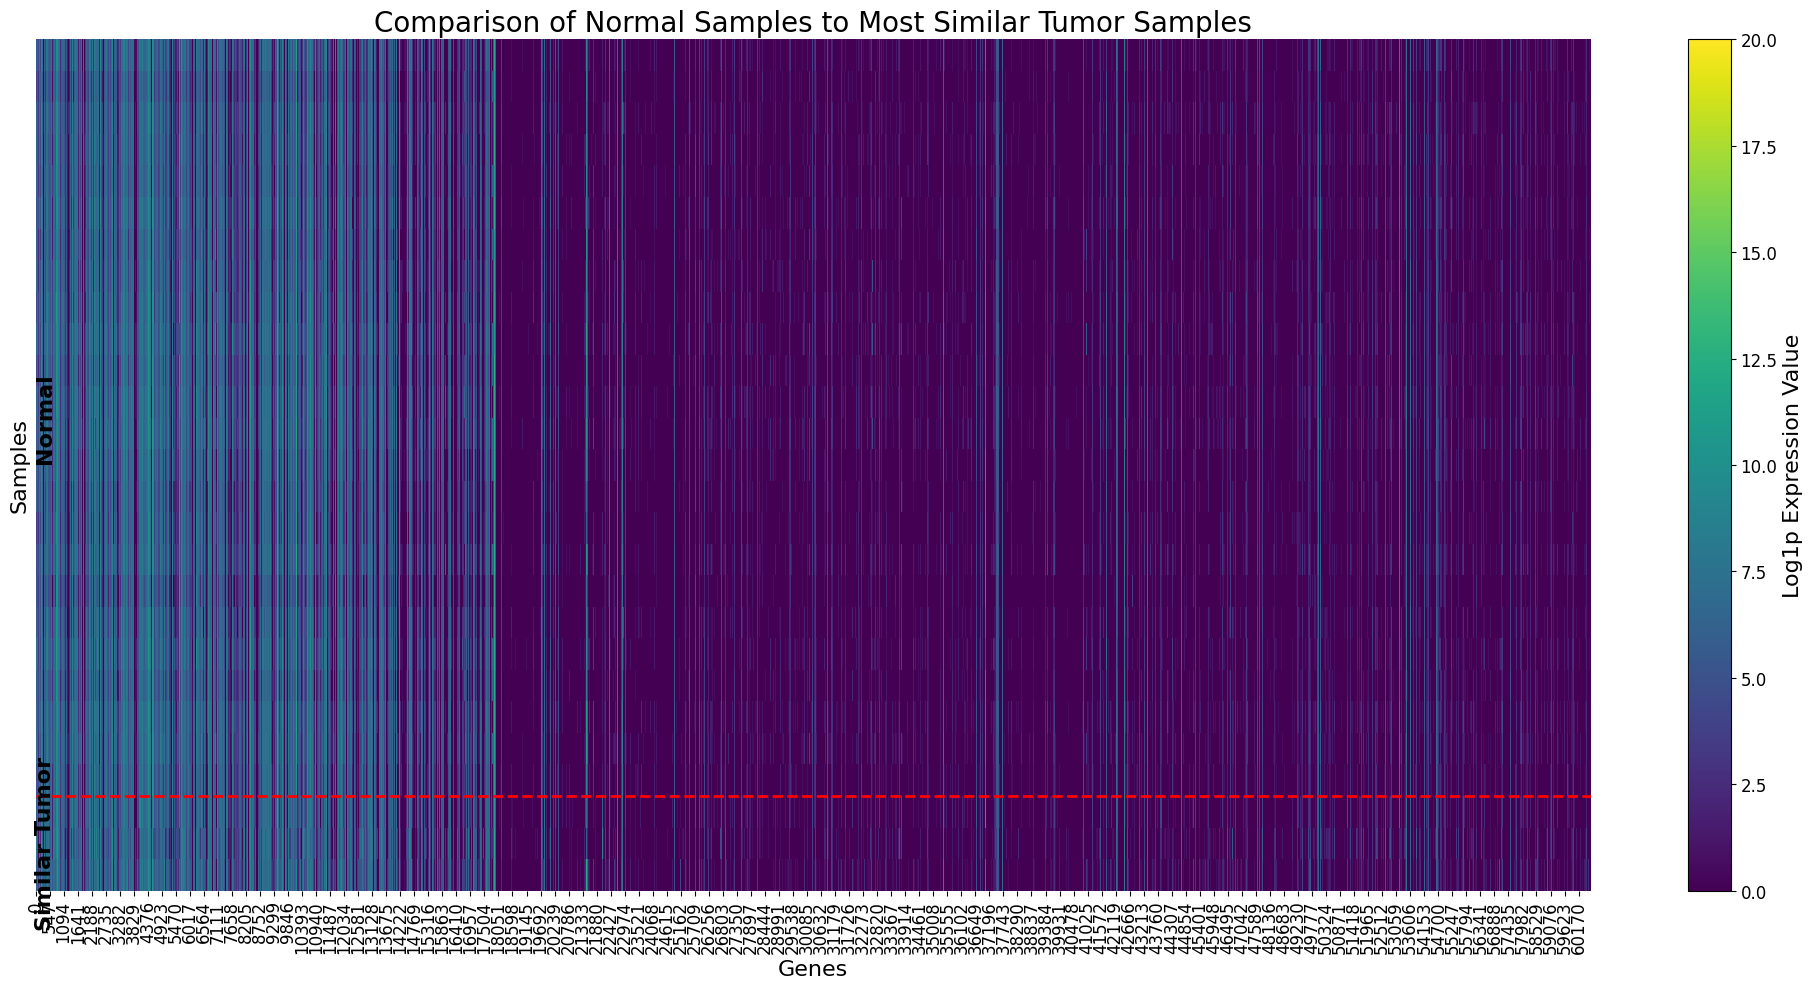

In [8]:
simulator = simulators.AutoencoderSimulator(data_from_bq_liver_hc)
simulator.plot_similarity_heatmap()

## Uterus Example

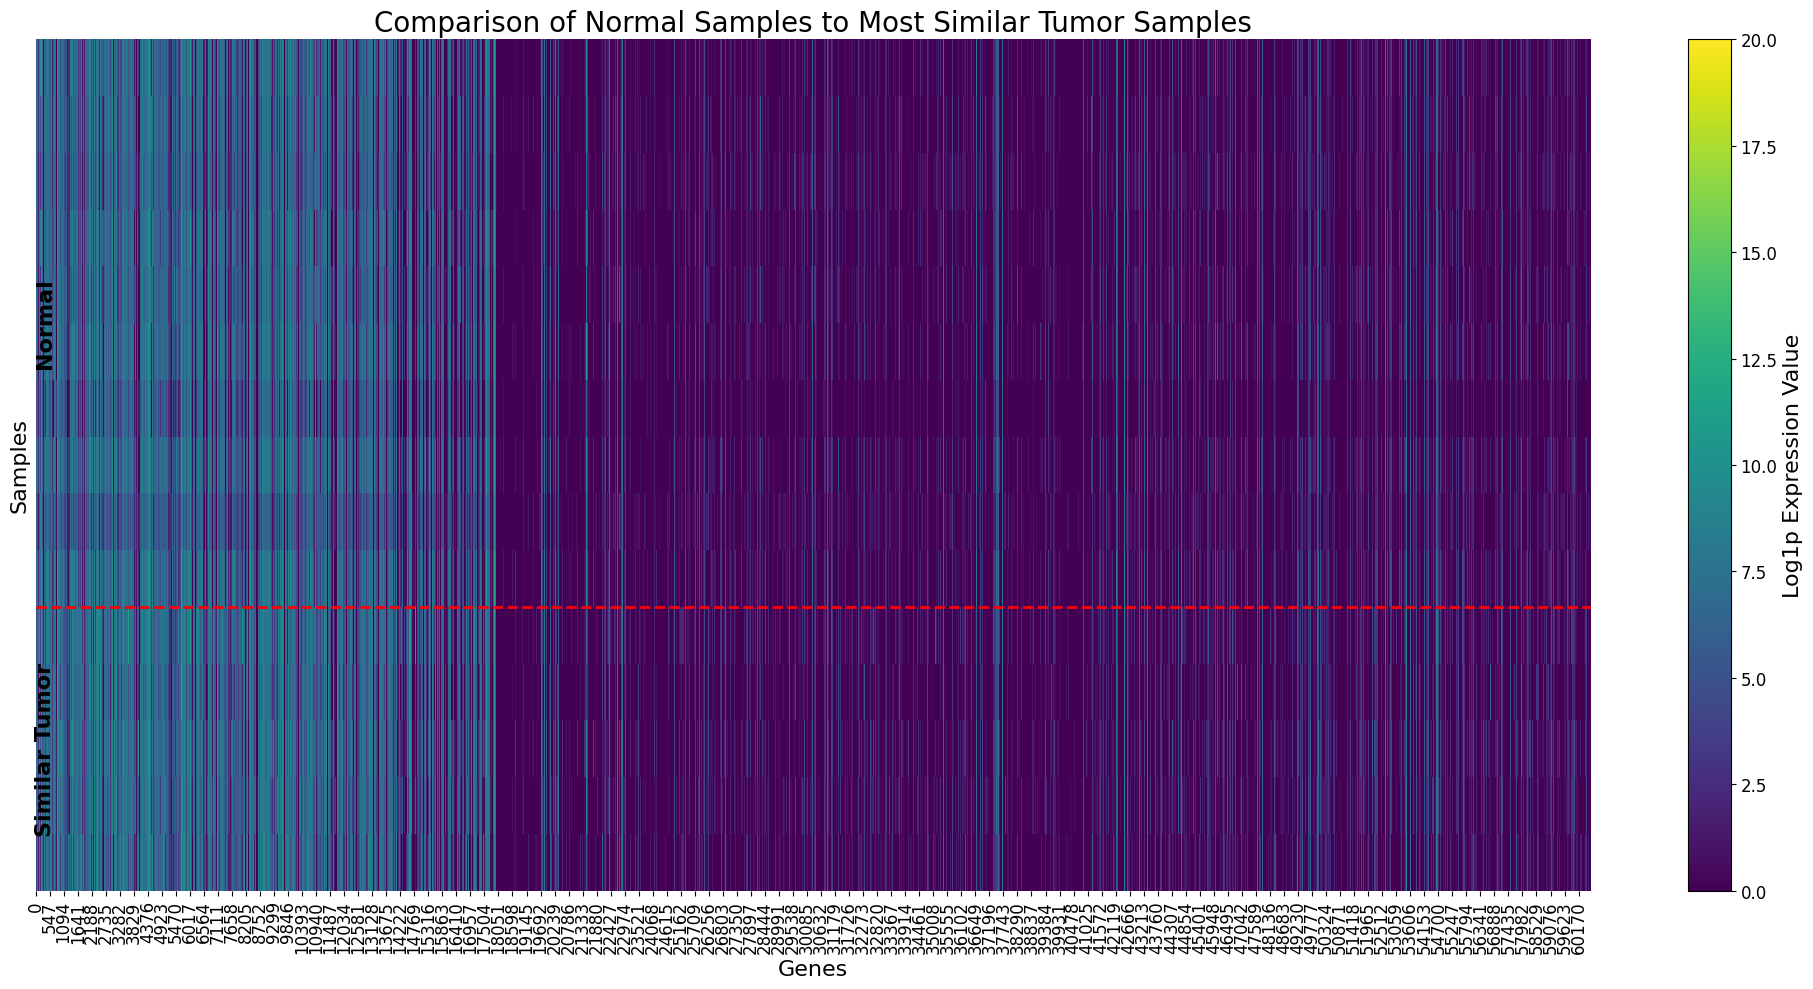

In [9]:
simulator = simulators.AutoencoderSimulator(data_from_bq_uterus)
simulator.plot_similarity_heatmap()

## Prostate Cancer Example

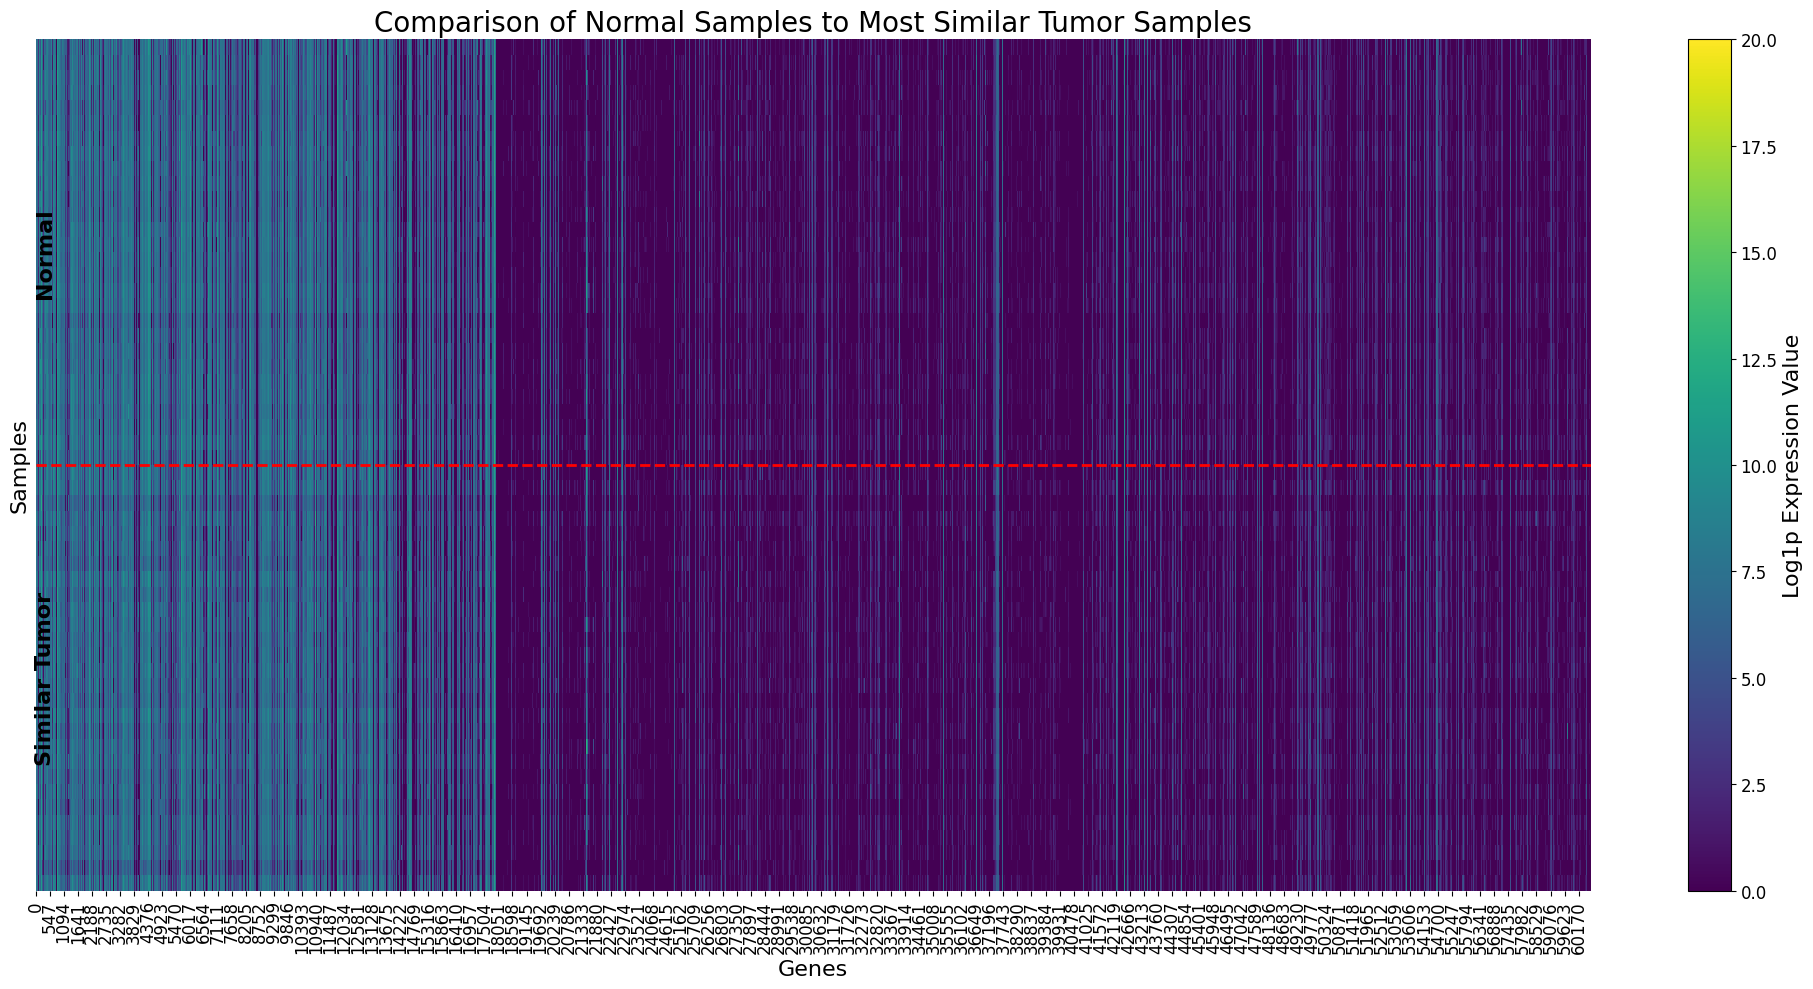

In [10]:
simulator = simulators.AutoencoderSimulator(data_from_bq_prostate)
simulator.plot_similarity_heatmap()